#     Bayes Project: Oxford Case - Smooth fit to log-Odds Ratios.

### Realised by : 
---
* Oussama Hadder
* Marwane Fahim
* Salimou Moussa
* Achraf Drissi 

---

## This notebook includes:
    - Gibbs sampling
    - Visualization
    - Comparison and Interpretation
    

In the early 1990s, researchers Breslow and Clayton conducted a thorough analysis of 2x2 contingency tables, which included cases of childhood cancer deaths and control groups, based on maternal exposure to X-rays. This extensive study examined a total of 120 combinations of age (ranging from 0 to 9 years old) and year of birth (spanning from 1944 to 1964), resulting in the creation of a table for each combination.

The purpose of the study was to identify any potential links between maternal exposure to X-rays and childhood cancer. The researchers analyzed each contingency table in great detail, meticulously examining the data to draw conclusions. They looked for any patterns or trends that could indicate a correlation between exposure to X-rays and the incidence of childhood cancer.

## Data and librairies imports :

In [190]:
import numpy as np
import pandas as pd
from scipy.special import expit
from numpy.random import gamma, normal
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange

In [191]:
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

#let's represent the data in one single dataframe easier manipulations
df = pd.DataFrame({'year': year,'n0': n0, 'n1': n1, 'r0': r0, 'r1':r1})
df.reset_index(drop=True, inplace=True)
df

,year,n0,n1,r0,r1
0,-10,28,28,0,3
1,-9,21,21,2,5
2,-9,32,32,2,2
3,-8,35,35,1,7
4,-8,35,35,2,7
...,...,...,...,...,...
115,8,51,51,2,5
116,8,42,42,4,7
117,9,46,46,6,6
118,9,54,54,4,3


## Utils Functions : 

In [192]:
#computes probablitiy p0 following the model
def compute_probability(mu, alpha, beta1, beta2, b, year):

    return expit(mu + alpha + beta1 * year + beta2 * (year ** 2 - 22) + b)

In [193]:
#computes the log of the likelihood function
def log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year):

    p1 = compute_probability(mu, alpha, beta1, beta2, b, year)
    return np.sum(r1 * np.log(p1)) + np.sum((n1 - r1) * np.log(1 - p1))

In [194]:
#initialization function
def init_chain(N, chain_type=1):

    if chain_type == 1:
        alpha, beta1, beta2, sigma2 = 0, 0, 0, 1
    else:
        alpha, beta1, beta2, sigma2 = 1, 1, 1, 10

    mu = np.zeros(N)
    b = np.zeros(N)

    return alpha, beta1, beta2, sigma2, mu, b

# Gibbs Sampling

To estimate the random variables listed earlier, we used the Gibbs algorithm, which is a Markov Chain Monte Carlo (MCMC) method of sampling. This algorithm generates samples from the posterior distribution of the parameters given the data.

To ensure the convergence of the algorithm, we used a burn-in phase of 1000 samples. During this phase, the samples generated by the algorithm are discarded and not used to estimate the parameters. This step helps to reduce the influence of the initial conditions on the final results.

In [195]:
def gibbs_sampling(nchain, df):
    
    #nchain number of years
    
    r0, n0, r1, n1, year = df['r0'], df['n0'], df['r1'], df['n1'], df['year']
    N = df.shape[0]
    
    alpha, beta1, beta2, sigma2, mu, b = init_chain(N, chain_type=1)
    
    #proposal standard deviation
    prop_sd=np.array([0.06, 0.03, 0.006, 0.1, 0.5])

    
    log_psi = alpha + beta1 * year + beta2 * (year**2 - 22) + b
    p0 = expit(mu)
    p1 = expit(mu + log_psi)
    
    chain4 = np.zeros((nchain+1, 4)) # chain of alpha, beta1, beta2 and sigma2
    b_chain = np.zeros((nchain+1, N)) # chaine of b
    mu_chain = np.zeros((nchain+1, N)) # chaine of mu
    
    
    # Initialization of the chains
    chain4[0,0] = alpha
    chain4[0,1] = beta1
    chain4[0,2] = beta2
    chain4[0,3] = sigma2
    b_chain[0,:] = b
    mu_chain[0,:] = mu
    
    # Let's fill up the chain by updating each time The parameters
    for i in trange(nchain):
        U = np.random.uniform()
        LVR = log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year)
        
        # update alpha
        prop_alpha = np.random.normal(loc=alpha, scale=prop_sd[0])
        prop_p1_alpha = compute_probability(mu, prop_alpha, beta1, beta2, b, year)

        top_alpha = - (prop_alpha ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_alpha)) + np.sum((n1 - r1) * np.log(1 - prop_p1_alpha))
        bottom_alpha = - (alpha ** 2 / (2 * 1e6)) + LVR

        acc_prob_alpha = np.exp(top_alpha - bottom_alpha)

        if U < acc_prob_alpha:
            alpha = prop_alpha
            p1 = prop_p1_alpha
        
        # update beta1
        prop_beta1 = np.random.normal(loc=beta1, scale=prop_sd[1])
        prop_p1_beta1 = compute_probability(mu, alpha, prop_beta1, beta2, b, year)

        top_beta1 = - (prop_beta1 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta1)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta1))
        bottom_beta1 = - (beta1 ** 2 / (2 * 1e6)) + LVR

        acc_prob_beta1 = np.exp(top_beta1 - bottom_beta1)

        if U < acc_prob_beta1:
            beta1 = prop_beta1
            p1 = prop_p1_beta1
            
        # update beta2
        prop_beta2 = np.random.normal(loc=beta2, scale=prop_sd[2])
        prop_p1_beta2 = compute_probability(mu, alpha, beta1, prop_beta2, b, year)

        top_beta2 = - (prop_beta2 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta2)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta2))
        bottom_beta2 = - (beta2 ** 2 / (2 * 1e6)) + LVR

        acc_prob_beta2 = np.exp(top_beta2 - bottom_beta2)

        if U < acc_prob_beta2:
            beta2 = prop_beta2
            p1 = prop_p1_beta2
        
            
        # update sigma2
        sigma2 = 1/gamma(shape = 1e-3 + N/2, scale = 1e-3 + 0.5 * sum(b**2))
            
        for j in range(N):
            
            # update mu
            prop = normal(loc = mu[j], scale = prop_sd[3])
            prop_p0 = expit(prop)
            prop_p1 = expit(prop + log_psi[j])
            
            top_mu = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0) + (n0[j] - r0[j]) * np.log(1 - prop_p0) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_mu = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_mu - bottom_mu)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0
                p1[j] = prop_p1
                
                
            # update b
            prop = normal(loc = b[j], scale = prop_sd[4])
            prop_log_psi = alpha + beta1 * year[j] + beta2 * (year[j]**2 - 22) + prop
            prop_p1 = expit(mu[j] + prop_log_psi)
            
            top_b = - (prop**2 / (2 * sigma2)) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_b = - (b[j]**2 / (2 * sigma2)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_b - bottom_b)
            
            if np.random.uniform() < acc_prob:
                b[j] = prop
                log_psi[j] = prop_log_psi
                p1[j] = prop_p1
    
        
        # update of the chains
        chain4[i+1,:] = np.array([alpha, beta1, beta2, sigma2])
        b_chain[i+1,:] = b 
        mu_chain[i+1,:] = mu
        
    # return the three chains
    return chain4, b_chain, mu_chain

In [196]:
#number of chains
nchain=10000
chain4, b_chain, mu_chain = gibbs_sampling(nchain, df)

100%|██████████| 10000/10000 [03:53<00:00, 42.86it/s]


In [197]:
burn_in=1000
#we discard the first 1000 as we consider them as burn in
alpha = chain4[1000:,0]
beta1 =  chain4[1000:,1]
beta2 = chain4[1000:,2]
sigma2 = chain4[1000:,3]
sigma = np.sqrt(sigma2)

#organizing the 4 parameters in one dataframe for later comparison with the results in the document
results = pd.DataFrame()
results['alpha']=alpha
results['beta1']=beta1
results['beta2']=beta2
results['sigma']=sigma


## Visualization of the estimated parameters $\alpha , \beta_1 , \beta_2$ and $\sigma$ : 

Here we are going to plot the Markov Chain of the estimated parameters based on the results given by the Gibbs algorithm.

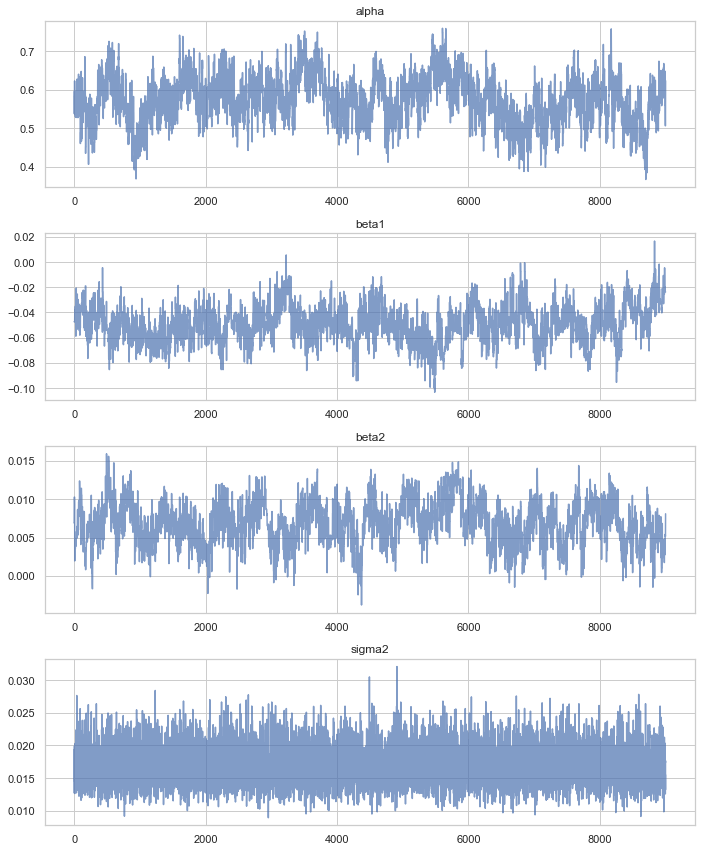

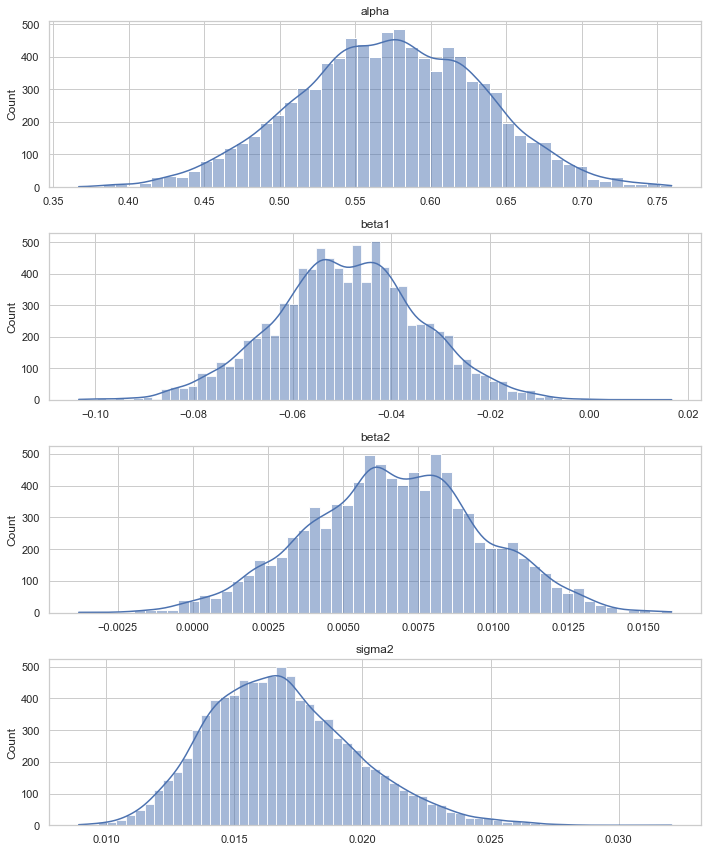

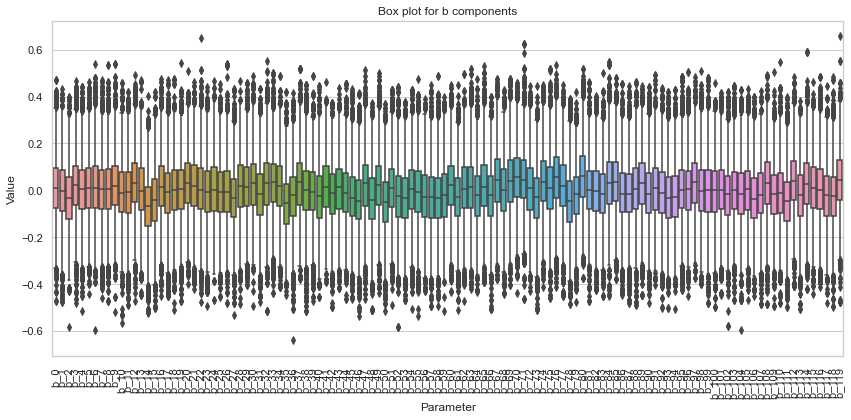

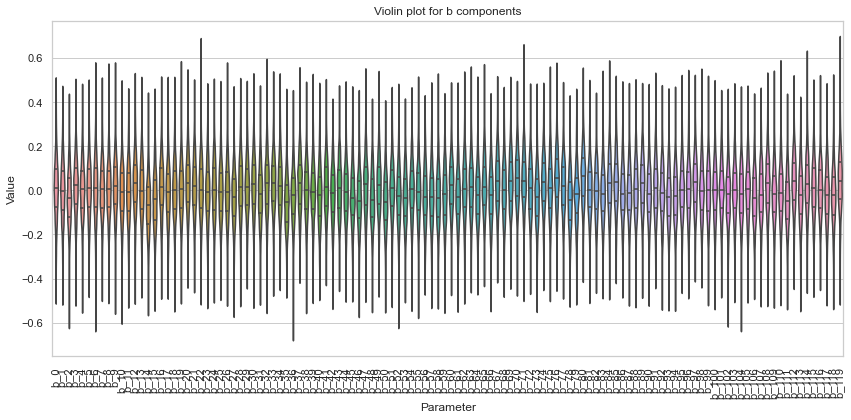

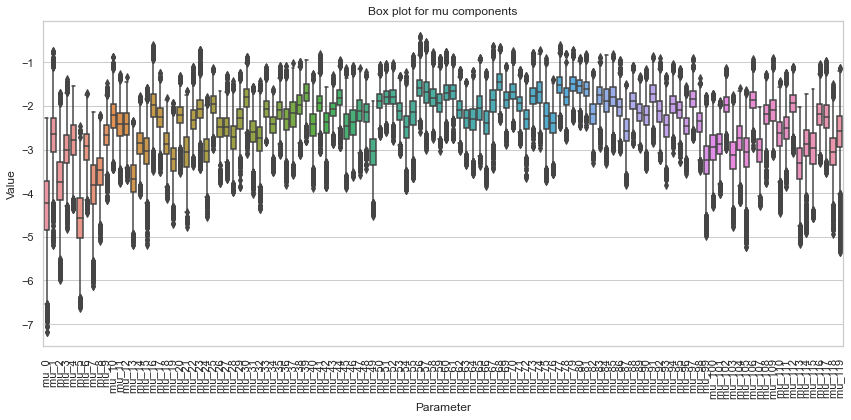

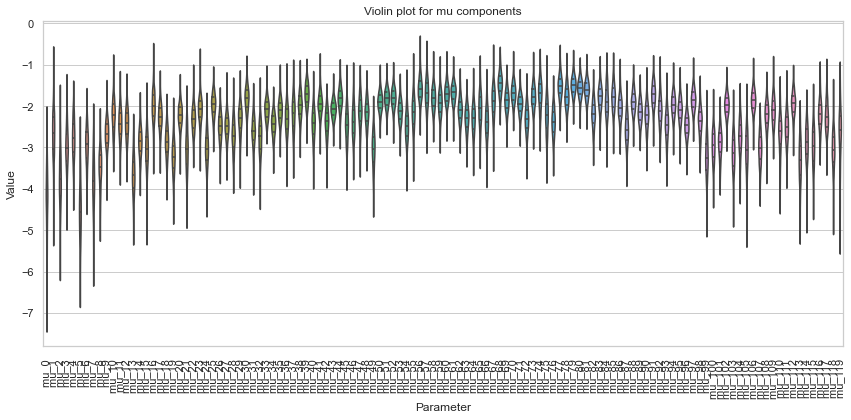

In [198]:

# Set the style for the plots
sns.set(style="whitegrid")

# Trace plots
def plot_trace(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        ax.plot(chains[burn_in:, idx], alpha=0.7)
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Histograms
def plot_histograms(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        sns.histplot(chains[burn_in:, idx], kde=True, ax=ax)
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Summary statistics
def summarize_chains(chains, param_names, burn_in):
    summary_df = pd.DataFrame(chains[burn_in:], columns=param_names).describe().transpose()
    return summary_df

def plot_boxplot(chains, param_names, burn_in, title=None):
    melted_df = pd.DataFrame(chains[burn_in:], columns=param_names).melt(var_name='Parameter', value_name='Value')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Parameter', y='Value', data=melted_df)
    if title:
        plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_violinplot(chains, param_names, burn_in, title=None):
    melted_df = pd.DataFrame(chains[burn_in:], columns=param_names).melt(var_name='Parameter', value_name='Value')
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile")
    if title:
        plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# Plot trace plots and histograms for alpha, beta1, beta2, sigma2
param_names = ['alpha', 'beta1', 'beta2', 'sigma2']
plot_trace(chain4, param_names, burn_in)
plot_histograms(chain4, param_names, burn_in)

#number of stratas
N = df.shape[0]


#condensed visualisations of all the components of b and mu using boxplot and violinplot
b_param_names = [f'b_{i} ' for i in range(N)]
mu_param_names = [f'mu_{i} ' for i in range(N)]

plot_boxplot(b_chain, b_param_names, burn_in, title="Box plot for b components")
plot_violinplot(b_chain, b_param_names, burn_in, title="Violin plot for b components")

plot_boxplot(mu_chain, mu_param_names, burn_in, title="Box plot for mu components")
plot_violinplot(mu_chain, mu_param_names, burn_in, title="Violin plot for mu components")

# Interpretation


Next, we will plot the log-odds curve as a function of years to interpret the results of our estimations.

The log-odds curve is a useful tool for visualizing the relationship between a binary outcome variable and a continuous predictor variable. In our case, the binary outcome variable is the presence or absence of the cancer in children, and the continuous predictor variable is time (in years). By plotting the log-odds curve, we can see how the probability of the event changes over time.

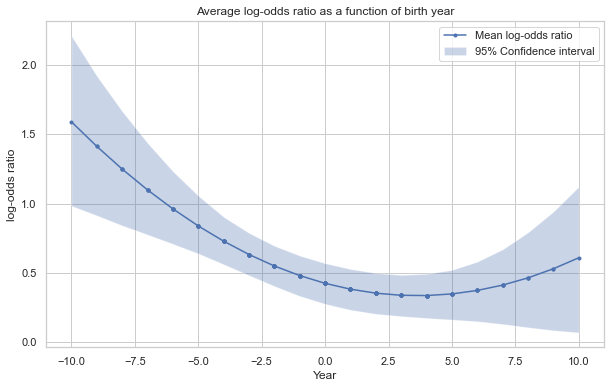

In [199]:
def calculate_logpsi_confidence_interval(chain_1, chain_2, year, burn_in=1000):
    alpha_samples = chain_1[burn_in:, 0]
    beta1_samples = chain_1[burn_in:, 1]
    beta2_samples = chain_1[burn_in:, 2]
    b_samples = chain_2[burn_in:]

    logpsi_samples = np.zeros((alpha_samples.shape[0], year.shape[0]))

    for i, (alpha, beta1, beta2) in enumerate(zip(alpha_samples, beta1_samples, beta2_samples)):
        logpsi_samples[i] = alpha + beta1 * year + beta2 * (year**2 - 22) + np.mean(b_samples[i], axis=0)

    logpsi_mean = np.mean(logpsi_samples, axis=0)
    logpsi_low, logpsi_high = np.percentile(logpsi_samples, [2.5, 97.5], axis=0)

    return logpsi_mean, logpsi_low, logpsi_high

def plot_logpsi_with_confidence_interval(year, logpsi_mean, logpsi_low, logpsi_high):
    plt.figure(figsize=(10, 6))
    plt.plot(year, logpsi_mean, linestyle='-', marker='o', markersize=3, label="Mean log-odds ratio")
    plt.fill_between(year, logpsi_low, logpsi_high, alpha=0.3, label="95% Confidence interval")
    plt.title("Average log-odds ratio as a function of birth year")
    plt.ylabel("log-odds ratio")
    plt.xlabel("Year")
    plt.legend()
    plt.show()
    

# Calculate the mean and 95% confidence interval of log-psi
logpsi_mean, logpsi_low, logpsi_high = calculate_logpsi_confidence_interval(chain, b_chain, year, burn_in=1000)

# Plot the results
plot_logpsi_with_confidence_interval(year, logpsi_mean, logpsi_low, logpsi_high)

The obtained curve shows the average evolution of the log-odds ratio as a function of year of birth. The curve shows a decrease in log(Ψ) with the year of birth, indicating that the odds ratio of exposure to X-rays in children with cancer compared to controls decreases over time. This trend could suggest a reduction in the risk associated with exposure to X-rays for more recently born children, possibly due to changes in medical practices or increased awareness of the risks.

This finding is significant as it suggests that efforts to reduce the exposure of pregnant women and children to X-rays may have been successful. It also highlights the importance of continued efforts to reduce unnecessary exposure to X-rays in medical settings, as well as the need for ongoing monitoring of trends in childhood cancer rates.

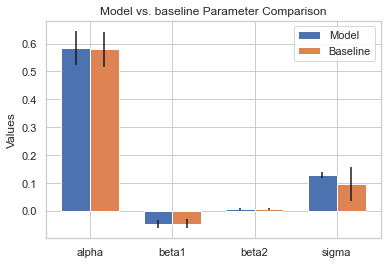

In [200]:
#Baseline here indicates Breslow and Clayton estimates
def plot_parameter_comparison(params_df):
    ind = np.arange(len(params_df))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind - width / 2, params_df['mean'], width, label='Model', yerr=params_df['std'])
    rects2 = ax.bar(ind + width / 2, params_df['mean_base'], width, label='Baseline', yerr=params_df['std_base'])

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Values')
    ax.set_title('Model vs. baseline Parameter Comparison')
    ax.set_xticks(ind)
    ax.set_xticklabels(['alpha', 'beta1', 'beta2', 'sigma'])
    ax.legend()

    plt.show()

results_summary = results.describe().T

params_df = pd.DataFrame()
params_df['mean'] = results_summary['mean']
params_df['std'] = results_summary['std']
#Breslow and Clayton estimates
params_df['mean_base'] = [0.579, -0.04557, 0.007041, 0.09697]
params_df['std_base'] = [0.062, 0.01553, 0.003084, 0.06011]
params_df.reset_index(drop=True, inplace=True)

plot_parameter_comparison(params_df)

By comparing our results with the reference values, we can see that our estimations are in line with our expectations. This demonstrates that our implementation of the Gibbs algorithm is working well, and that our model is suitable for analyzing the data in this research.

This is an important validation of our approach, as it confirms that our statistical model is capturing the underlying patterns in the data. It also gives us confidence in the accuracy of our results and the reliability of our conclusions.